# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
import numpy as np

In [5]:
# Examine the shape of the training and test sets
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
# dimensions of the images are 32 x 32, with 3 RGB values
print("image dimensions: ", x_train.shape[1:] )

# number of classes
print( "number of classes", len(np.unique(y_train)) )
print( "number of classes names", len(np.unique(class_names)) )

image dimensions:  (32, 32, 3)
number of classes 100
number of classes names 100


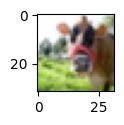

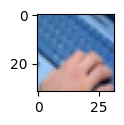

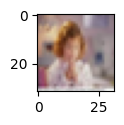

In [7]:
# Show a few examples from the training set.
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(x_train[0])
plt.figure(figsize=(1, 1))
plt.imshow(x_train[10])
plt.figure(figsize=(1, 1))
plt.imshow(x_train[4568])

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [8]:
# Normalize the image pixels
x_train_normal = x_train / x_train.max()
x_test_normal = x_test / x_test.max()

In [9]:
print("Min pixel value:", np.min(x_train_normal))
print("Max pixel value:", np.max(x_train_normal))

Min pixel value: 0.0
Max pixel value: 1.0


In [10]:
# Convert labels to one-hot
from tensorflow.keras.utils import to_categorical
# sacramento_encoded = pd.get_dummies(sacramento, columns = ['type'], drop_first=False)

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

#Convert y-values into one-hot vectors
#def one_hot(n_classes, y):
  #  return np.y_test(n_classes)[y]

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [11]:
# Split the training set into 80 % training and 20% validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    x_train_normal,
    y_train,
    test_size=0.2, # 20% of the data is used for validation
    random_state=42
)

#the 50k X training set has been split into 40k train and 10k validation
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [11]:
# Create your own model, has to be different from other people's
# Predict class via model using Keras
# max pooling shrinks the size of images
# make sure output dimension is the number of classes you're trying to predict
# model.summary() to show the name, output shape, and param of each layer

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# Convolution layer
model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Convolution layer 2
model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Pooling layer
model.add(MaxPool2D(pool_size=(4,4), strides=(4,4), padding="valid")) #try reducing to pool and stride for finer learning

# Flatten
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(100, activation='softmax')) # 100 neurons, softmax activation

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,876 (874.52 KB)

 Trainable params: 223,876 (874.52 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [13]:
from tensorflow.keras.losses import categorical_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [19]:
history8 = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_val, y_val)
)

#Last epoch  accuracy: 0.4965 - loss: 1.8831 - val_accuracy: 0.3619 - val_loss: 2.5903

Epoch 1/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 69ms/step - accuracy: 0.0845 - loss: 4.0934 - val_accuracy: 0.2312 - val_loss: 3.2261
Epoch 2/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.2693 - loss: 2.9959 - val_accuracy: 0.2963 - val_loss: 2.8267
Epoch 3/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.3420 - loss: 2.6240 - val_accuracy: 0.3238 - val_loss: 2.7056
Epoch 4/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 72ms/step - accuracy: 0.3868 - loss: 2.3741 - val_accuracy: 0.3375 - val_loss: 2.6349
Epoch 5/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 68ms/step - accuracy: 0.4179 - loss: 2.2306 - val_accuracy: 0.3580 - val_loss: 2.5703
Epoch 6/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.4523 - loss: 2.0983 - val_accuracy: 0.3637 - val_loss: 2.5584
Epoch 7/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.4737 - loss: 1.9729 - val_accuracy: 0.3637 - val_loss: 2.5802
Epoch 8/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.4965 - los

In [ ]:
#Rerun model creation and compilation before fitting with diff epochs
history20 = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

#Interrupted early due to diverging  loss vs validation loss
#17th epoch  accuracy: 0.6842 - loss: 1.1075 - val_accuracy: 0.3498 - val_loss: 3.3011

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 128s 78ms/step - accuracy: 0.0919 - loss: 4.0329 - val_accuracy: 0.2363 - val_loss: 3.1324
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 81ms/step - accuracy: 0.2770 - loss: 2.9463 - val_accuracy: 0.3117 - val_loss: 2.8074
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 70ms/step - accuracy: 0.3452 - loss: 2.5923 - val_accuracy: 0.3360 - val_loss: 2.6896
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 74ms/step - accuracy: 0.3975 - loss: 2.3498 - val_accuracy: 0.3432 - val_loss: 2.6802
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.4383 - loss: 2.1745 - val_accuracy: 0.3562 - val_loss: 2.5814
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 70ms/step - accuracy: 0.4676 - loss: 2.0230 - val_accuracy: 0.3599 - val_loss: 2.5977
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 73ms/step - accuracy: 0.4938 - loss: 1.8977 - val_accuracy: 0.3557 - val_loss: 2.6315
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 70ms/step - accuracy: 

In [14]:
#Rerun model creation and compilation before fitting with diff epochs
history10 = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

#Last epoch  accuracy: 0.5168 - loss: 1.7924  - val_accuracy: 0.3712  - val_loss: 2. 6184

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 74ms/step - accuracy: 0.0797 - loss: 4.1076 - val_accuracy: 0.2314 - val_loss: 3.1982
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 69ms/step - accuracy: 0.2593 - loss: 3.0414 - val_accuracy: 0.2817 - val_loss: 2.9079
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 73ms/step - accuracy: 0.3349 - loss: 2.6541 - val_accuracy: 0.3311 - val_loss: 2.7029
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 71ms/step - accuracy: 0.3828 - loss: 2.4327 - val_accuracy: 0.3250 - val_loss: 2.7174
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.4019 - loss: 2.3179 - val_accuracy: 0.3504 - val_loss: 2.6246
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.4290 - loss: 2.1802 - val_accuracy: 0.3500 - val_loss: 2.6326
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.4562 - loss: 2.0632 - val_accuracy: 0.3662 - val_loss: 2.5933
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 73ms/step - accuracy: 0.

I chose 10 epochs because it's a moderate value. Fewer epochs might be unstable and underfitting the model , and more epochs leads to greater overfitting. The validation loss isn't decreasing as quickly as the training loss, but it's not increasing as it was with 20 epochs.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3689
- <b>Other metric:</b> F1
- <b>Reason for selection:</b> Balance between precision and recall
- <b>Value of metric:</b> 0.3624
- <b>Interpretation of metric value:</b> there was poor balance between the model's ability to detect positives correctly and positives where they exist

In [15]:
#Precision (PPV): of all the items labeled as positive, how many were truly positive
#Useful when the cost of false positives is high (e.g. don't want to misclassify legitimate emails as spam).
#Recall (Sensitivity): of all the actual positive items, how many were correctly identified?
#Useful when the cost of false negatives is high (e.g., in disease detection, where you don't want to miss any actual cases).
#F1-Score: The harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.
#Useful when you need to find a balance between precision and recall.

from sklearn.metrics import accuracy_score, f1_score

# 1) Prediction outcome on testing set
y_pred= model.predict(x_test_normal)

# 2) Get prob of getting each class
y_pred_index = np.argmax(y_pred, axis=1) #axis is the predicted, max is the max prob
y_test_index = np.argmax(y_test, axis=1) #this is the actual y outcome

# 3) Print results
print(f'Accuracy: {accuracy_score(y_test_index, y_pred_index)}')
print(f'F1: {f1_score(y_test_index, y_pred_index, average="weighted")}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Accuracy: 0.3689
F1: 0.3624099193642184


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [17]:
print(history10.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


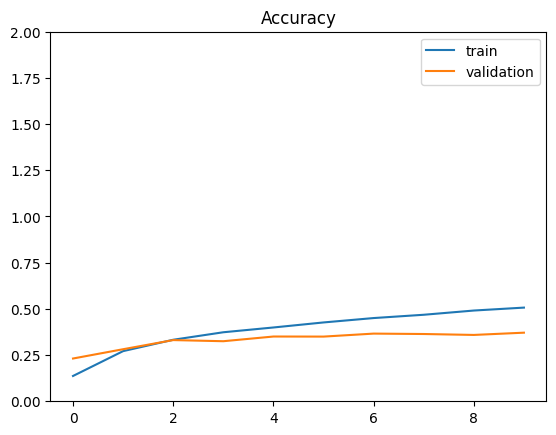

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history10.history['accuracy'], label='train')
plt.plot(history10.history['val_accuracy'], label='validation')

plt.ylim(0, 2)
plt.legend(loc='best')
plt.title('Accuracy');

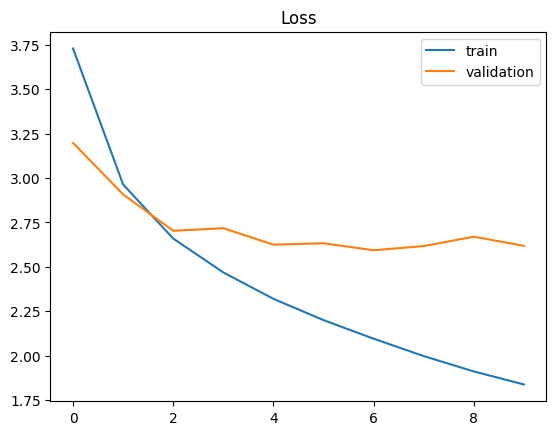

In [19]:
plt.plot(history10.history['loss'], label='train')
plt.plot(history10.history['val_loss'], label='validation')

plt.legend(loc='best')
plt.title('Loss');

In [20]:
#Find the correctly predicted classes
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
correct_pred= np.where(y_pred_labels==y_test_labels)[0]

print(len(correct_pred), correct_pred)

3689 [   3    4    8 ... 9997 9998 9999]


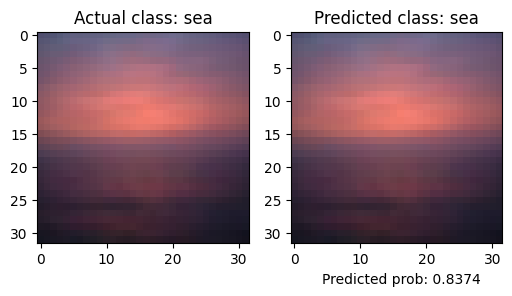

In [21]:
sample_index = 4

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title(f"Actual class: {class_names[y_test_labels[sample_index]]}")

axes[1].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title(f"Predicted class: {class_names[y_pred_labels[sample_index]]}")

fig.text(0.6, 0.01, f"Predicted prob: {np.max(y_pred, axis=1)[sample_index]:.4f}")

plt.show()

In [22]:
#Find the incorrectly predicted classes
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
incorrect_pred= np.where(y_pred_labels!=y_test_labels)[0]

print(len(incorrect_pred), incorrect_pred)

6311 [   0    1    2 ... 9994 9995 9996]


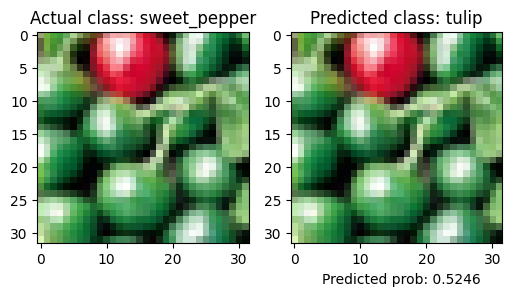

In [24]:
sample_index = 9995

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title(f"Actual class: {class_names[y_test_labels[sample_index]]}")

axes[1].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title(f"Predicted class: {class_names[y_pred_labels[sample_index]]}")

fig.text(0.6, 0.01, f"Predicted prob: {np.max(y_pred, axis=1)[sample_index]:.4f}")

plt.show()

In [ ]:
loss = categorical_crossentropy(y_test, y_pred).numpy()
print(f"Test Loss: {np.mean(loss)}")

Validation set performs worse than training set in terms of accuracy and loss. The Loss graph shows that it fluctuates in the validation set over epochs but decreases in the training set, possibly signalling overfitting. The accuracy is 0.3689 meaning that 36.89% of the samples were accurately classified. As seen in the example of an incorrect prediction, the model predicted the peppers as a tulip which was wrong (although they look like tomatoes to me).

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [33]:
# regularization, dropout, change network size etc.
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import regularizers

model2 = Sequential()

model2.add(Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))

model2.add(MaxPool2D(pool_size=(4,4), strides=(4,4), padding="valid"))
model2.add(Flatten())

# Increase neurons in Dense layer from 128 to 256
model2.add(Dense(256, activation='relu'))

# Add a Dropout layer to reduce overfitting
model2.add(Dropout(0.5))

model2.add(Dense(100, activation='softmax'))

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,508 (1.67 MB)

 Trainable params: 437,508 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [34]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

history2 = model2.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)
# 50% dropout accuracy: 0.3922 - loss: 2.2861 - val_accuracy: 0.3827 - val_loss: 2.4221

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 73ms/step - accuracy: 0.0565 - loss: 4.2435 - val_accuracy: 0.2211 - val_loss: 3.2438
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.1934 - loss: 3.3429 - val_accuracy: 0.2848 - val_loss: 2.8952
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.2523 - loss: 3.0301 - val_accuracy: 0.3250 - val_loss: 2.7151
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 72ms/step - accuracy: 0.2961 - loss: 2.8157 - val_accuracy: 0.3365 - val_loss: 2.6351
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 76ms/step - accuracy: 0.3153 - loss: 2.6780 - val_accuracy: 0.3582 - val_loss: 2.5492
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - accuracy: 0.3411 - loss: 2.5534 - val_accuracy: 0.3563 - val_loss: 2.5406
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - accuracy: 0.3534 - loss: 2.4786 - val_accuracy: 0.3745 - val_loss: 2.4522
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 78ms/step - accuracy: 0.3

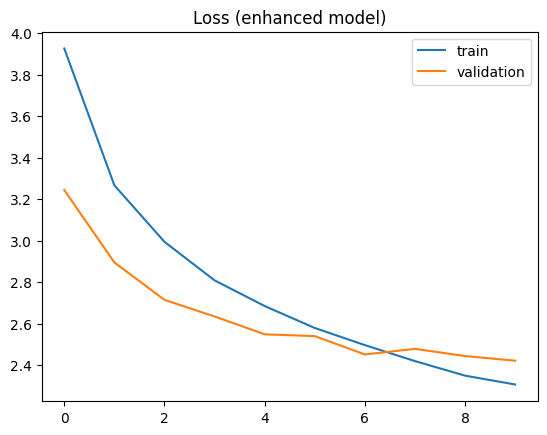

In [35]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')

plt.legend(loc='best')
plt.title('Loss (enhanced model)');

In [36]:
#Accuracy and F1 of enhanced model

y_pred2= model2.predict(x_test_normal)

y_pred_index2 = np.argmax(y_pred2, axis=1)

print(f'Accuracy: {accuracy_score(y_test_index, y_pred_index2)}')
print(f'F1: {f1_score(y_test_index, y_pred_index2, average="weighted")}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Accuracy: 0.3797
F1: 0.37318009754475334


In [38]:
#Find the correctly predicted classes
y_pred2_labels = np.argmax(y_pred2, axis=1)
correct_pred2= np.where(y_pred2_labels==y_test_labels)[0]

print(len(correct_pred2), correct_pred2)

3797 [   1    4   11 ... 9993 9998 9999]


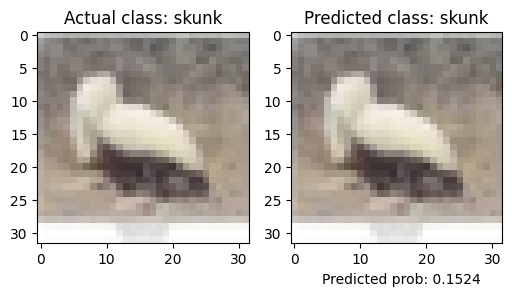

In [39]:
sample_index = 11

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title(f"Actual class: {class_names[y_test_labels[sample_index]]}")

axes[1].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title(f"Predicted class: {class_names[y_pred2_labels[sample_index]]}")

fig.text(0.6, 0.01, f"Predicted prob: {np.max(y_pred2, axis=1)[sample_index]:.4f}")

plt.show()

In [40]:
#Find the incorrectly predicted classes
incorrect_pred2= np.where(y_pred2_labels!=y_test_labels)[0]

print(len(incorrect_pred2), incorrect_pred2)

6203 [   0    2    3 ... 9995 9996 9997]


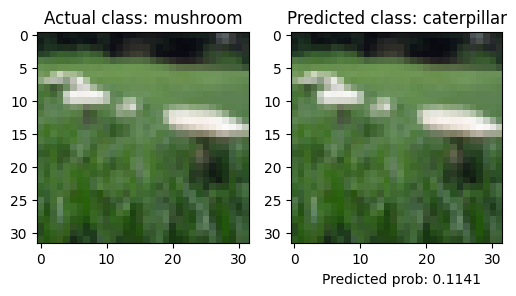

In [41]:
sample_index = 9997

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title(f"Actual class: {class_names[y_test_labels[sample_index]]}")

axes[1].imshow(x_test[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[1].set_title(f"Predicted class: {class_names[y_pred2_labels[sample_index]]}")

fig.text(0.6, 0.01, f"Predicted prob: {np.max(y_pred2, axis=1)[sample_index]:.4f}")

plt.show()

In [37]:
#Print loss in the testing set
loss = categorical_crossentropy(y_test, y_pred).numpy()
loss2 = categorical_crossentropy(y_test, y_pred2).numpy()

print(f"Test Loss: {np.mean(loss)}")
print(f"Test Loss (enhanced model): {np.mean(loss2)}")

Test Loss: 2.6088321208953857
Test Loss (enhanced model): 2.4029037952423096


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model was enhanced by increasing the number of neurons in the dense layer from 128 to increase the model's learning complexity. The enhanced model has an accuracy of 0.3797 and F1 score of 0.37318. These performance metrics are only slightly better than the original model which had accuracy of 0.3689 and F1 of 0.3624. Perhaps learning wasn't complex enough, e.g. not enough layers or neuron count.
A dropout layer (50% of the neurons were dropped) was also added to reduce potential overfitting in the original model. The Loss graph of the enhanced model shows a smaller gap between the testing and validation sets. However, the testing set's loss was 2.40 in the enhanced model vs. 2.60 in the original model so it only improved slightly.
Other things to try could be adding more layers for more complex learning, and increasing the pooling size and stride for broader learning of the low resolution images.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.